In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier  # Use KerasClassifier instead of KerasRegressor
from sklearn.model_selection import GridSearchCV

2024-07-28 20:58:42.714906: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 20:58:42.717447: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-28 20:58:42.724313: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-28 20:58:42.734959: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-28 20:58:42.738120: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-28 20:58:42.747399: I tensorflow/core/platform/cpu_feature_gu

# Data preparation

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Add channel dimension to the data
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Search for optimal parameters

In [3]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Owijanie modelu Keras do użytku w scikit-learn
model = KerasClassifier(model=create_model, verbose=0)

# Definiowanie siatki hiperparametrów z różnymi kombinacjami
param_grid = {
    'batch_size': [32, 48, 64],
    'epochs': [10, 15, 20]
}

# Grid Search z opcją verbose do śledzenia postępu
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, verbose=2, scoring='accuracy')
grid_result = grid.fit(x_train, y_train, validation_split=0.2)

print("Najlepszy wynik: %f przy użyciu %s" % (grid_result.best_score_, grid_result.best_params_))

# Tworzenie finalnego modelu z optymalnymi hiperparametrami
best_params = grid_result.best_params_

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ...........................batch_size=32, epochs=10; total time=  10.3s
[CV] END ...........................batch_size=32, epochs=10; total time=   9.9s
[CV] END ...........................batch_size=32, epochs=15; total time=  14.0s
[CV] END ...........................batch_size=32, epochs=15; total time=  14.2s
[CV] END ...........................batch_size=32, epochs=20; total time=  18.6s
[CV] END ...........................batch_size=32, epochs=20; total time=  19.1s
[CV] END ...........................batch_size=48, epochs=10; total time=   8.3s
[CV] END ...........................batch_size=48, epochs=10; total time=   8.3s
[CV] END ...........................batch_size=48, epochs=15; total time=  12.0s
[CV] END ...........................batch_size=48, epochs=15; total time=  12.0s
[CV] END ...........................batch_size=48, epochs=20; total time=  14.8s
[CV] END ...........................batch_size=48

# Create model with best parameters

In [8]:
model = create_model()

# Training the final model
model.fit(x_train, y_train,
                validation_split=0.2,
                epochs=best_params['epochs'],
                batch_size=best_params['batch_size'],
                verbose=1)

# Evaluate the final model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}, Test loss: {test_loss}')

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6528 - loss: 0.9572 - val_accuracy: 0.8437 - val_loss: 0.4266
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8294 - loss: 0.4817 - val_accuracy: 0.8562 - val_loss: 0.3948
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8481 - loss: 0.4296 - val_accuracy: 0.8613 - val_loss: 0.3892
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8616 - loss: 0.3925 - val_accuracy: 0.8638 - val_loss: 0.3664
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8648 - loss: 0.3726 - val_accuracy: 0.8705 - val_loss: 0.3499
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8714 - loss: 0.3582 - val_accuracy: 0.8797 - val_loss: 0.3345
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8746 - loss: 0.3424 - val_accuracy: 0.8796 - val_loss: 0.3434
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8795 - loss: 0.3350 - val_accuracy: 0.

# Save model

In [12]:
model.save("model.keras")

# Classification test

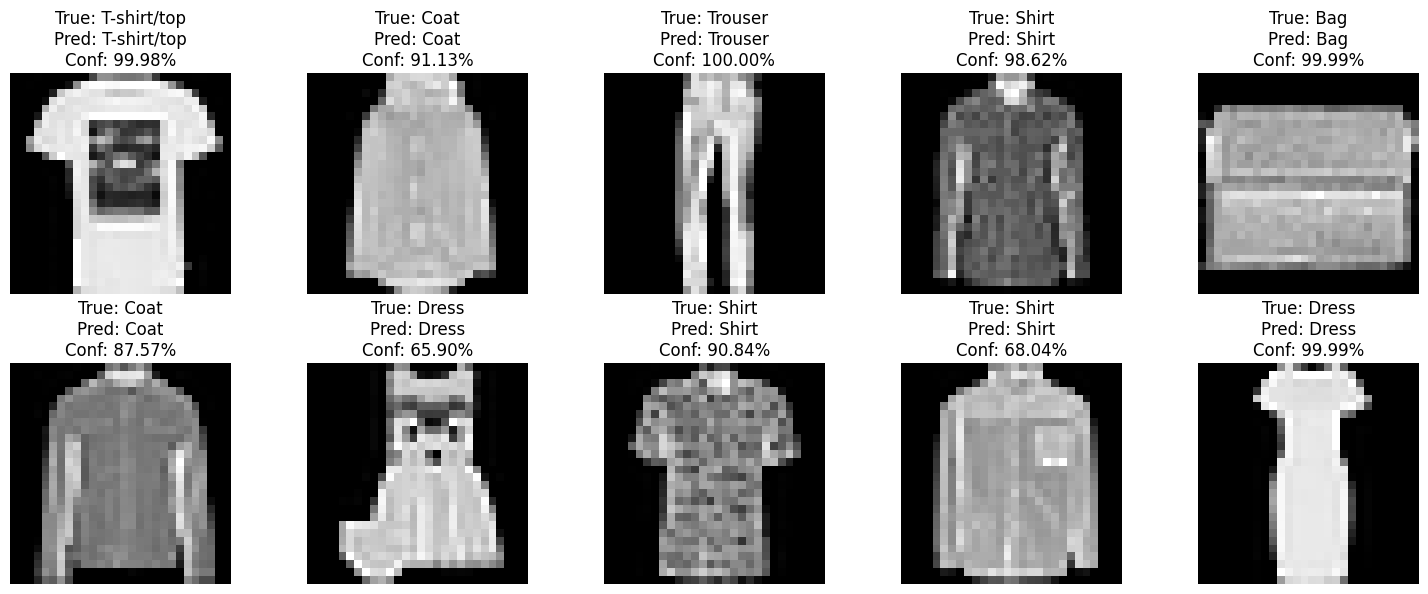

In [13]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Generating a list of unique, random numbers
unique_random_numbers = random.sample(range(len(x_test)), 10)

# Dictionary to map labels to their respective names
fm_label = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Setting up the grid layout
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Iterating over unique random numbers and displaying images with predictions
for ax, sample_num in zip(axes.flatten(), unique_random_numbers):
    x1 = x_test[sample_num].reshape(28, 28)
    prediction = model(np.array([x_test[sample_num]]))
    
    # Get predicted label and confidence
    predicted_probs = prediction[0]  # Assuming prediction is of shape (1, num_classes)
    predicted_label = np.argmax(predicted_probs)
    confidence = predicted_probs[predicted_label] * 100  # Convert to percentage
    
    # Get true label
    true_label = np.argmax(y_test[sample_num])  # Assuming y_test is one-hot encoded
    
    # Translate labels to names
    true_label_name = fm_label[true_label]
    predicted_label_name = fm_label[predicted_label]

    # Display image with title showing true label, predicted label, and confidence
    ax.imshow(x1, cmap='gray')
    ax.set_title(f"True: {true_label_name}\nPred: {predicted_label_name}\nConf: {confidence:.2f}%")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Summary

In this assignment, the architecture of the network was chosen based on preliminary research not included in the notebook. The parameters used in the grid search were also derived from these preliminary studies.

It was feasible to achieve the 91% accuracy target using a standard dense neural network. However, while this level of accuracy was achieved, the model exhibited a high loss. This high loss resulted in significant errors due to misclassification of images with high confidence, where the network often predicted the wrong class with strong certainty. 

Additionally, the classification test results were as follows:
- The model achieved 10 out of 10 correct predictions.
- For 2 predictions, the model’s confidence was below 70%.
- For 1 prediction, the confidence was close to 90%.
- For the remaining predictions, the model’s confidence was very close to 100% and one prediction was made with 100%.

This indicates that while the model is generally reliable, there are specific cases where its confidence does not align with the accuracy, highlighting areas for further refinement.